In [45]:
import random
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from local_libs.Get_Categories import CategorySelector
from local_libs.color_filter import bcolors as cf
from local_libs.clear_data import clear_data

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

#Downloads necessários para executar o código
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.simplefilter('ignore', UserWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [46]:
def export_dataset():
    #Lista de links (arquivos estão dentro do Google Sheets)
    test_links = {
        'link_01': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQvClyfCtk8JD82zXYSipnN7iCJ0XG0V-z6tcII_14W7tQYPpLLOK45kKWLQf8TBfyRNhH9mlEXiowR/pub?output=csv',
        'link_02': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQq0fLn7Dkg0-Lg2i9FUD0iL-xLVHn1Gtorx8wLlA7flMftChIJf_PXgziaHshCnxlX52bZJZ2EKFsu/pub?output=csv'
    }
    train_links ={
        'link_01':'https://docs.google.com/spreadsheets/d/e/2PACX-1vS2E4FyELPrgf1rPIeyh4lzQTOtftYYK6vyr7m5TN7cYDZTo4tLy1jZQ06mnnwo0NrJ5ZR5IOm2-ndN/pub?output=csv',
        'link_02':'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-NHTDb71tp400NvyVObenotd8uUATgPgl4nlGwvqpwTTMoCmc8bH7YmyvmzBg_TcIAxoNkC0upfoe/pub?output=csv',       
        'link_03':'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_vX9ELHWxTt5kPrcZ8LchIXnBrd2QvbsuA5f_cHLWhaSvoa9DERR5W7oKE9489UzfFruwyek2XJvW/pub?output=csv',
        'link_04':'https://docs.google.com/spreadsheets/d/e/2PACX-1vSi7JewvqVkONWiqbFWqyQjTOmtxrsEtZ4ArifmlCMELo9BAPw00BpnZ1BI9wx_ruE4nPbY3egzjEfx/pub?output=csv',
        'link_05':'https://docs.google.com/spreadsheets/d/e/2PACX-1vTooCcyaoXnkazJ6HI95oc-Ll45cMY4qnjh6iIa9HVJfhTej2z9EBDVVHgplEhqLfegmeucud1mXMhS/pub?output=csv'
    }
   
    #Download e leitura do arquivo de treinamento
    temp_df_test = pd.DataFrame()
    for i in test_links:
        file_temp = pd.read_csv(test_links[i])
        temp_df_test = pd.concat([temp_df_test,file_temp]) 
    temp_df_test.reset_index(drop=True, inplace=True)
    temp_df_test.drop('Unnamed: 0',axis=1, inplace= True)

    #Download e leitura do arquivo de teste
    temp_df_train = pd.DataFrame()
    for i in train_links:
        file_temp = pd.read_csv(train_links[i])
        temp_df_train = pd.concat([temp_df_train,file_temp]) 
    temp_df_train.reset_index(drop=True, inplace=True)
    temp_df_train.drop('Unnamed: 0',axis=1, inplace= True)   
   
    return temp_df_test, temp_df_train

test, train = export_dataset()

| Nome da coluna | Tipo | Descrição | Observação |
| :---- | :---- | :--- | :--- |
| test_id | Numérica discreta | Representa o índice do produto | - |
| name | Categórico nominal | Titulo da lista* | - |
| item_condition_id | Catégorico ordinal | Numero que identifica a condição do item | Está em escala de 1 a 5, sendo 1 a melhor e 5 a pior |
| category_name | Categórico nominal | Categorias vinculadas ao produto | - |
| brand_name | Categórico nominal | Nome da marca do item | - |
| price | Numérica discreta | Preço do produto anunciado | Coluna alvo do arquivo teste |
| shipping | Categórico nominal | Identifica quem pagou a taxa de envio | <p>1 - Vendedor</p><p> 0 - Comprador</p> |
| item_description | Categórico nominal | Descrição completa do item* | - |
| date | Categórico ordinal | Data da venda | - |
| stock | Numérico ordinal | Quantidade em estoque | - |

# Primeiras informações sobre o dataset

In [47]:
#Função responsável por montagem de gráfico de barras
#Caso countplot seja igual a "False", é necessário forncer um y
def criar_barplot(dados,titulo, x , y = None , countplot = False):
  if countplot == False:
    fig = sns.barplot(x=x,y=y,data=dados)
    fig.figure.set_size_inches(24,6)
    fig.set_title(titulo,fontsize=18)
    fig.set_xlabel('Categoria',fontsize=14)
    fig.set_ylabel('Quantidade',fontsize=14)
  else:
    fig = sns.countplot(x=x,data=dados)
    fig.figure.set_size_inches(24,6)
    fig.set_title(titulo,fontsize=18)
    fig.set_xlabel('Categoria',fontsize=14)
    fig.set_ylabel('Quantidade',fontsize=14)
  return fig

<AxesSubplot:title={'center':'Quantidade total dividos por qualidade do item'}, xlabel='Categoria', ylabel='Quantidade'>

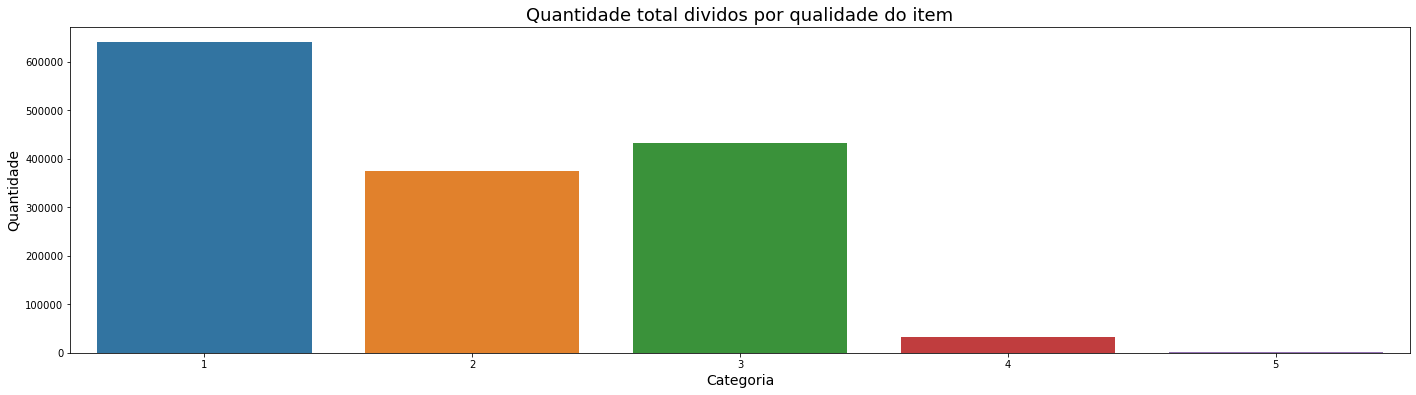

In [48]:
criar_barplot(train, 'Quantidade total dividos por qualidade do item', x = 'item_condition_id', countplot=True)

In [49]:
print('Information about train')
print('\n')
print(f'\tNumber of samples: {cf.GREEN}{train.shape[0]}{cf.ENDC} | Number of columns: {cf.GREEN}{train.shape[1]}{cf.ENDC} ')
print(f'\tTrain column names: {cf.BOLD}{list(train.columns)}{cf.BOLD}')
print('\n')
print('__________________________________________________________________')
print('\n')
print('Information about test')
print('\n')
print(f'\tNumber of samples: {cf.GREEN}{test.shape[0]}{cf.ENDC} | Number of columns: {cf.GREEN}{test.shape[1]}{cf.ENDC} ')
print(f'\tTrain column names: {cf.BOLD}{list(test.columns)}{cf.BOLD}')

Information about train


	Number of samples: 1482535 | Number of columns: 10 
	Train column names: ['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name', 'price', 'shipping', 'item_description', 'date', 'stock']


__________________________________________________________________


Information about test


	Number of samples: 693359 | Number of columns: 9 
	Train column names: ['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'item_description', 'date', 'stock']


In [50]:
print('Information about train')
print('\n')
print(train.info())
print('\n')
print('__________________________________________________________________')
print('\n')
print('Information about test')
print('\n')
print(test.info())

Information about train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476256 non-null  object 
 4   brand_name         850368 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   date               1482535 non-null  object 
 9   stock              1482535 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 113.1+ MB
None


__________________________________________________________________


Information about test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (tota

## Limpeza de dados

In [51]:
train = clear_data(train)

# Seletor de categorias

<p style = 'color:lightcyan'>Para maiores informações: /local_libs/Get_Categories.py</p>
<p style = 'color:lightcyan'>For more informations: /local_libs/Get_Categories.py</p>


In [53]:
# Chamando a classe de seleção de categorias
# Fornecendo as informações principais, sendo que elas são:
# main_frame, a base principal de dados
# column, coluna alvo que servirá de base para seleção de categorias
# main_category_name, retorna uma lista com apenas os nomes das categorias principais
# return_first_category, retorna uma dataframe com a primeira categoria e suas respectivas contagens
# save_files, retorna os arquivos em fornado .csv (verificar armazenamento interno)
# O output da função "get_categories", caso return_first_category são duas variáveis
# second_category_dict é um dicionário em que:

#       A chave do dicionário é uma categoria principal
#       Os dados dentro da chave são todas as linhas da base de dados que tem como categoria principal a chave do dicionário
#       Esses dados precisam ser reindexados

general_selector = CategorySelector(train , train['category_name'], return_first_category=True)
first_category , second_category_dict = general_selector.get_categories()

In [54]:
first_category

,category_name,Count
0,Women,664131
1,Beauty,207573
2,Kids,171426
3,Electronics,122598
4,Men,93415
5,Home,68121
6,Other,48286
7,Vintage & Collectibles,46639
8,Handmade,30750
9,Sports & Outdoors,25344


# Primeira categoria

<AxesSubplot:title={'center':'Quantitativo de categorias primárias'}, xlabel='Categoria', ylabel='Quantidade'>

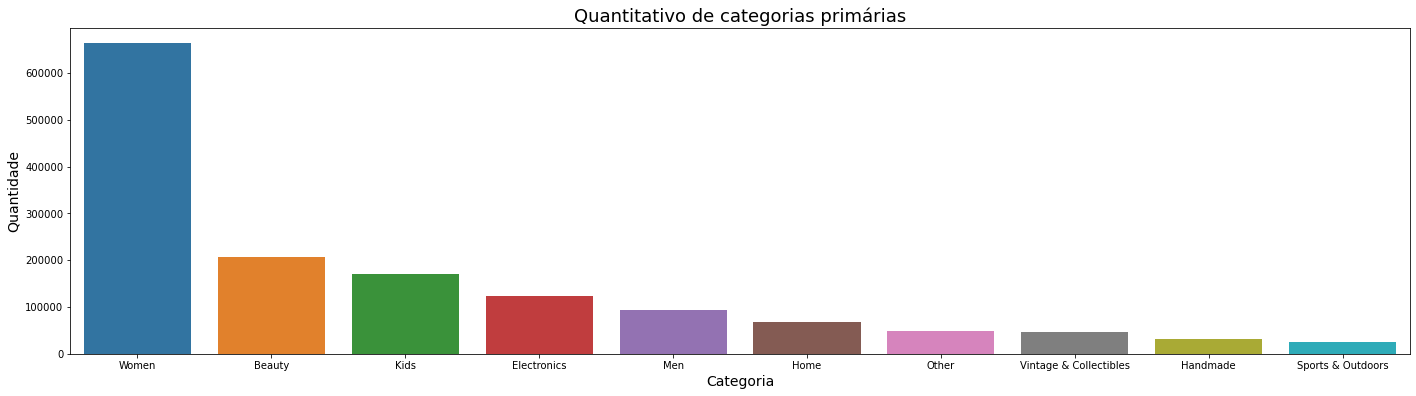

In [55]:
criar_barplot(first_category, 'Quantitativo de categorias primárias', x = 'category_name', y = 'Count')

# Categoria Homem | "Men"

In [56]:
# Já que será chamado uma função secundária da classe, é preciso apenas chamar a classe, não inicia-la
selector = CategorySelector

In [57]:
# É realizado uma limpeza dentro das categorias que apenas contém a categoria principal de homem
# Todos os códigos posteriores respeitam essa linha de raciocínio 
# É acessado o dicionário através do nome de uma categoria principal como chave, acessado a coluna de categorias e reinciado o index, como citado anteriormente
# É passado a função name_and_count_category_level, para mais informações de funcionamento visualizar /local_libs/Get_Categories.py, sendo que o output é:
#       Um dataframe com a contagem e os nomes de cada categoria
#       Um dataframe com a porcentagem e os nomes de cada categoria
#       Seria possível ter os nomes das categorias, mas já que as outras funções já fazem isso não se fez necessário, então foi ignorado esse output

column_men = second_category_dict['Men']['category_name'].reset_index(drop=True)
men_subcategories_count, __ , men_subcategories_percentage = selector.name_and_count_category_level(column_men, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Men{cf.ENDC}')
men_subcategories_count

Valores totais dentro da subcategoria Men


,category_name,Count
0,Shoes,22470
1,Tops,20752
2,Men's Accessories,18646
3,Athletic Apparel,10789
4,Sweats & Hoodies,8252
5,Jeans,3834
6,Coats & Jackets,3325
7,Sweaters,1457
8,Shorts,1449
9,Pants,933


In [58]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Men{cf.ENDC}')
men_subcategories_percentage

Valores percentuais da subcategoria Men


,category_name,Percentage
0,Shoes,0.240540
1,Tops,0.222148
2,Men's Accessories,0.199604
3,Athletic Apparel,0.115495
4,Sweats & Hoodies,0.088337
5,Jeans,0.041043
6,Coats & Jackets,0.035594
7,Sweaters,0.015597
8,Shorts,0.015511
9,Pants,0.009988


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Homem'}, xlabel='Categoria', ylabel='Quantidade'>

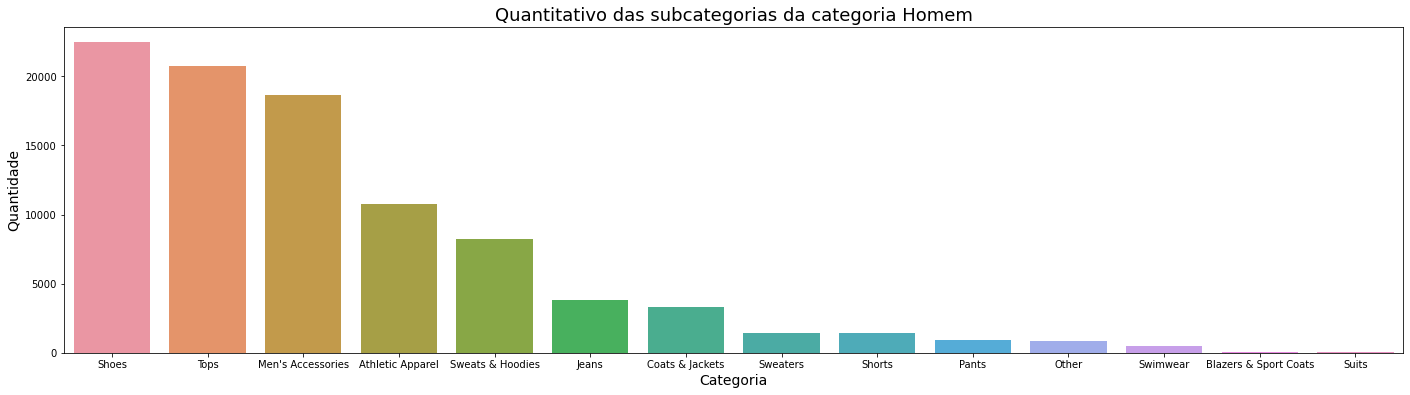

In [59]:
criar_barplot(men_subcategories_count, 'Quantitativo das subcategorias da categoria Homem', x = 'category_name', y='Count')

## Categoria Mulher | "Women"

In [60]:
column_women = second_category_dict['Women']['category_name'].reset_index(drop=True)
women_subcategories_count, __ , women_subcategories_percentage= selector.name_and_count_category_level(column_women, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Women{cf.ENDC}')
women_subcategories_count

Valores totais dentro da subcategoria Women


,category_name,Count
0,Athletic Apparel,123142
1,Tops & Blouses,106865
2,Shoes,77888
3,Jewelry,56866
4,Women's Handbags,46047
5,Dresses,45457
6,Women's Accessories,42437
7,Sweaters,34271
8,Underwear,33742
9,Jeans,32199


In [61]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Woman{cf.ENDC}')
women_subcategories_percentage

Valores percentuais da subcategoria Woman


,category_name,Percentage
0,Athletic Apparel,0.185418
1,Tops & Blouses,0.160910
2,Shoes,0.117278
3,Jewelry,0.085625
4,Women's Handbags,0.069334
5,Dresses,0.068446
6,Women's Accessories,0.063899
7,Sweaters,0.051603
8,Underwear,0.050806
9,Jeans,0.048483


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Mulher'}, xlabel='Categoria', ylabel='Quantidade'>

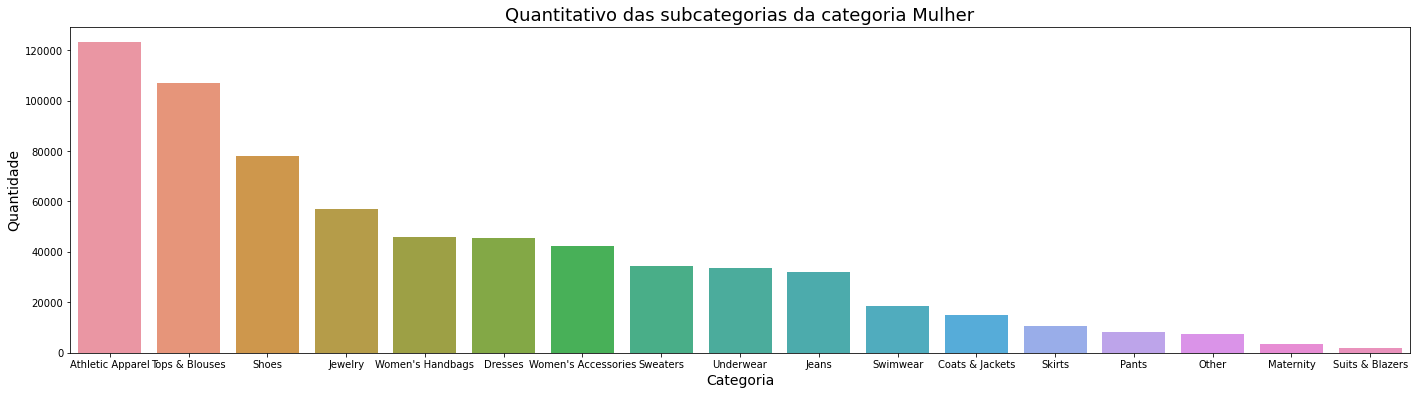

In [62]:
criar_barplot(women_subcategories_count, 'Quantitativo das subcategorias da categoria Mulher', x = 'category_name', y='Count')

# Categoria Antigos e Colecionáveis | "Vintage & Collectibles"

In [63]:
column_vintage_collectibles = second_category_dict['Vintage & Collectibles']['category_name'].reset_index(drop=True)
vintage_collectibles_subcategories_count, __ , vintage_collectibles_subcategories_percentage= selector.name_and_count_category_level(column_vintage_collectibles, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
vintage_collectibles_subcategories_count

Valores totais dentro da subcategoria Vintage & Collectibles


,category_name,Count
0,Toy,7363
1,Trading Cards,6545
2,Antique,6124
3,Collectibles,5754
4,Bags and Purses,3189
5,Clothing,2743
6,Electronics,2699
7,Jewelry,2552
8,Accessories,2275
9,Serving,1842


In [64]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
vintage_collectibles_subcategories_percentage

Valores percentuais da subcategoria Vintage & Collectibles


,category_name,Percentage
0,Toy,0.157872
1,Trading Cards,0.140333
2,Antique,0.131306
3,Collectibles,0.123373
4,Bags and Purses,0.068376
5,Clothing,0.058813
6,Electronics,0.057870
7,Jewelry,0.054718
8,Accessories,0.048779
9,Serving,0.039495


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Antigos e Colecionáveis'}, xlabel='Categoria', ylabel='Quantidade'>

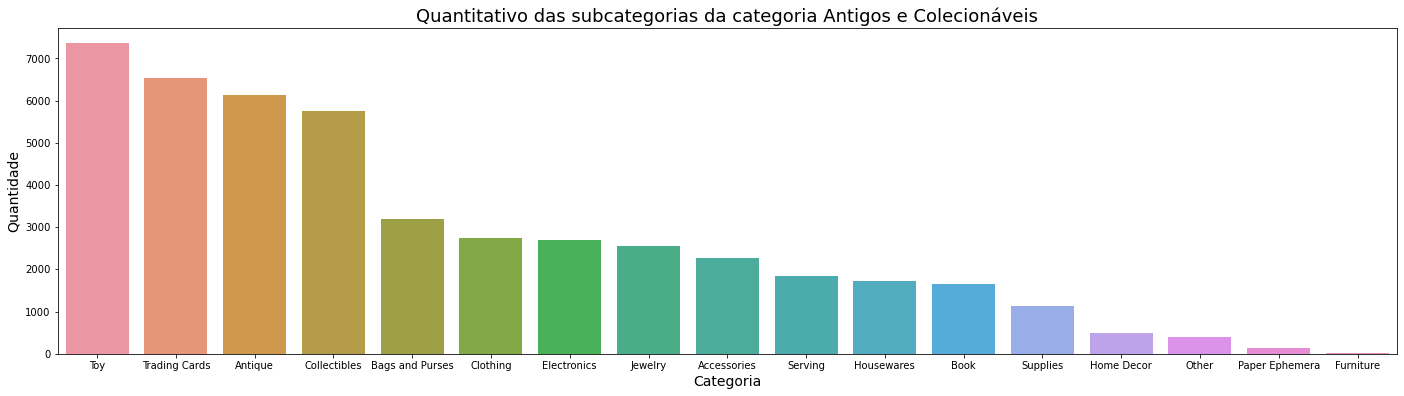

In [65]:
criar_barplot(vintage_collectibles_subcategories_count, 'Quantitativo das subcategorias da categoria Antigos e Colecionáveis', x = 'category_name', y='Count')

# Categoria Feito a mão | "Handmade"

In [66]:
column_handmade = second_category_dict['Handmade']['category_name'].reset_index(drop=True)
handmade_subcategories_count, __ , handmade_subcategories_percentage= selector.name_and_count_category_level(column_handmade, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Handmade{cf.ENDC}')
handmade_subcategories_count

Valores totais dentro da subcategoria Handmade


,category_name,Count
0,Paper Goods,6126
1,Accessories,6004
2,Clothing,5589
3,Bags and Purses,3161
4,Jewelry,2407
5,Children,1262
6,Music,874
7,Art,674
8,Glass,606
9,Weddings,587


In [67]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Handmade{cf.ENDC}')
handmade_subcategories_percentage

Valores percentuais da subcategoria Handmade


,category_name,Percentage
0,Paper Goods,0.199220
1,Accessories,0.195252
2,Clothing,0.181756
3,Bags and Purses,0.102797
4,Jewelry,0.078276
5,Children,0.041041
6,Music,0.028423
7,Art,0.021919
8,Glass,0.019707
9,Weddings,0.019089


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Feito a mão'}, xlabel='Categoria', ylabel='Quantidade'>

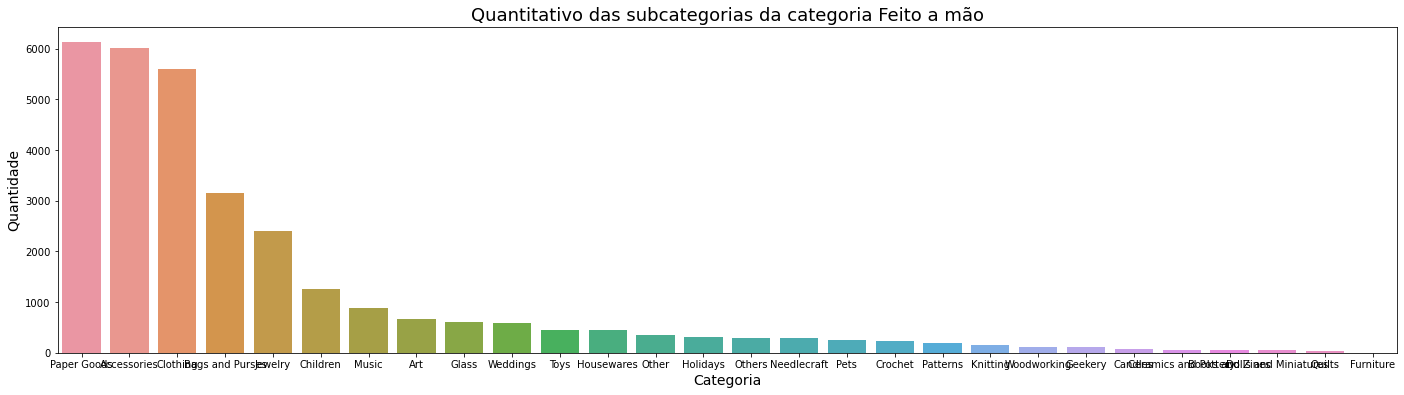

In [68]:
criar_barplot(handmade_subcategories_count, 'Quantitativo das subcategorias da categoria Feito a mão', x = 'category_name', y='Count')

# Categoria Eletronicos | "Electronics"

In [69]:
column_eletronics = second_category_dict['Electronics']['category_name'].reset_index(drop=True)
eletronics_subcategories_count, __ , eletronics_subcategories_percentage= selector.name_and_count_category_level(column_eletronics, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Electronics{cf.ENDC}')
eletronics_subcategories_count

Valores totais dentro da subcategoria Electronics


,category_name,Count
0,Cell Phones & Accessories,53190
1,Video Games & Consoles,35958
2,Media,11583
3,"TV, Audio & Surveillance",9244
4,Computers & Tablets,7357
5,Cameras & Photography,3966
6,Other,769
7,"Car Audio, Video & GPS",531


In [70]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Electronics{cf.ENDC}')
eletronics_subcategories_percentage

Valores percentuais da subcategoria Electronics


,category_name,Percentage
0,Cell Phones & Accessories,0.433857
1,Video Games & Consoles,0.293300
2,Media,0.094480
3,"TV, Audio & Surveillance",0.075401
4,Computers & Tablets,0.060009
5,Cameras & Photography,0.032350
6,Other,0.006273
7,"Car Audio, Video & GPS",0.004331


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Eletronicos'}, xlabel='Categoria', ylabel='Quantidade'>

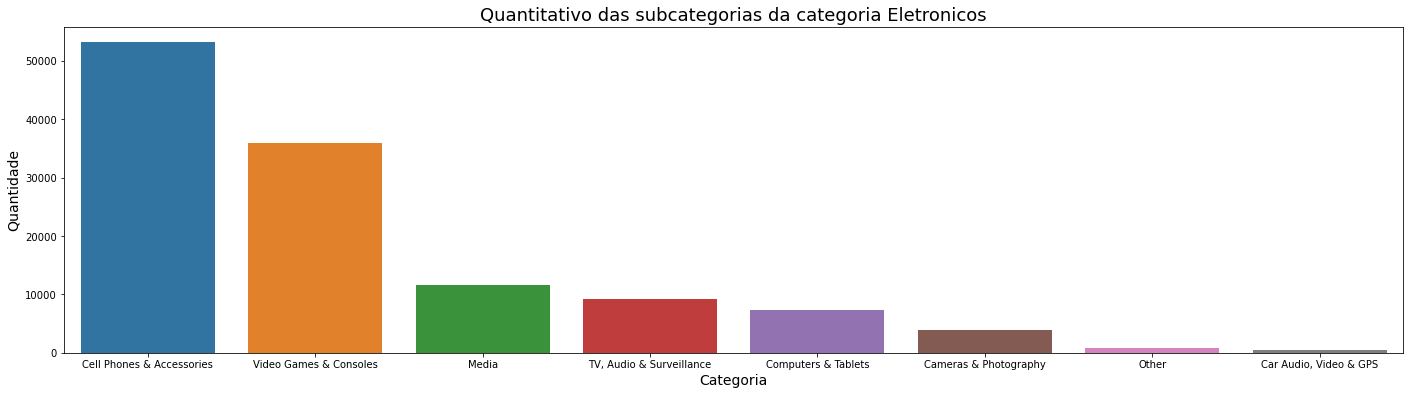

In [71]:
criar_barplot(eletronics_subcategories_count, 'Quantitativo das subcategorias da categoria Eletronicos', x = 'category_name', y='Count')

# Categoria Casa | "Home"

In [72]:
column_home = second_category_dict['Home']['category_name'].reset_index(drop=True)
home_subcategories_count, __ , home_subcategories_percentage= selector.name_and_count_category_level(column_home, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
home_subcategories_count

Valores totais dentro da subcategoria Vintage & Collectibles


,category_name,Count
0,Home Décor,25105
1,Kitchen & Dining,22096
2,Seasonal Décor,4933
3,Bedding,4271
4,Storage & Organization,2866
5,Home Appliances,2628
6,Cleaning Supplies,2417
7,Artwork,1261
8,Bath,1216
9,Kids' Home Store,663


In [73]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Home{cf.ENDC}')
home_subcategories_percentage

Valores percentuais da subcategoria Home


,category_name,Percentage
0,Home Décor,0.368535
1,Kitchen & Dining,0.324364
2,Seasonal Décor,0.072415
3,Bedding,0.062697
4,Storage & Organization,0.042072
5,Home Appliances,0.038578
6,Cleaning Supplies,0.035481
7,Artwork,0.018511
8,Bath,0.017851
9,Kids' Home Store,0.009733


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Casa'}, xlabel='Categoria', ylabel='Quantidade'>

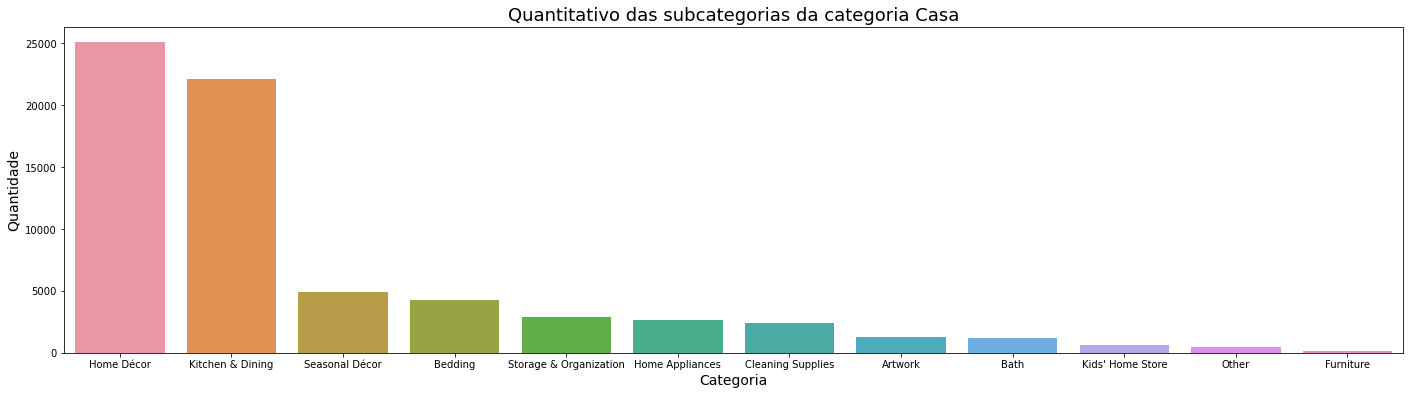

In [74]:
criar_barplot(home_subcategories_count, 'Quantitativo das subcategorias da categoria Casa', x = 'category_name', y='Count')

# Categoria Esportes e ar livre | "Sports & Outdoors"

In [75]:
column_sports_outdoors = second_category_dict['Sports & Outdoors']['category_name'].reset_index(drop=True)
sports_outdoors_subcategories_count, __ , sports_outdoors_subcategories_percentage= selector.name_and_count_category_level(column_sports_outdoors, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Sports & Outdoors{cf.ENDC}')
sports_outdoors_subcategories_count

Valores totais dentro da subcategoria Sports & Outdoors


,category_name,Count
0,Exercise,7995
1,Fan Shop,6285
2,Outdoors,4298
3,Apparel,2920
4,Team Sports,2128
5,Golf,816
6,Footwear,540
7,Other,362


In [76]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Sports & Outdoors{cf.ENDC}')
sports_outdoors_subcategories_percentage

Valores percentuais da subcategoria Sports & Outdoors


,category_name,Percentage
0,Exercise,0.315459
1,Fan Shop,0.247988
2,Outdoors,0.169586
3,Apparel,0.115215
4,Team Sports,0.083965
5,Golf,0.032197
6,Footwear,0.021307
7,Other,0.014283


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Esportes e ar livre'}, xlabel='Categoria', ylabel='Quantidade'>

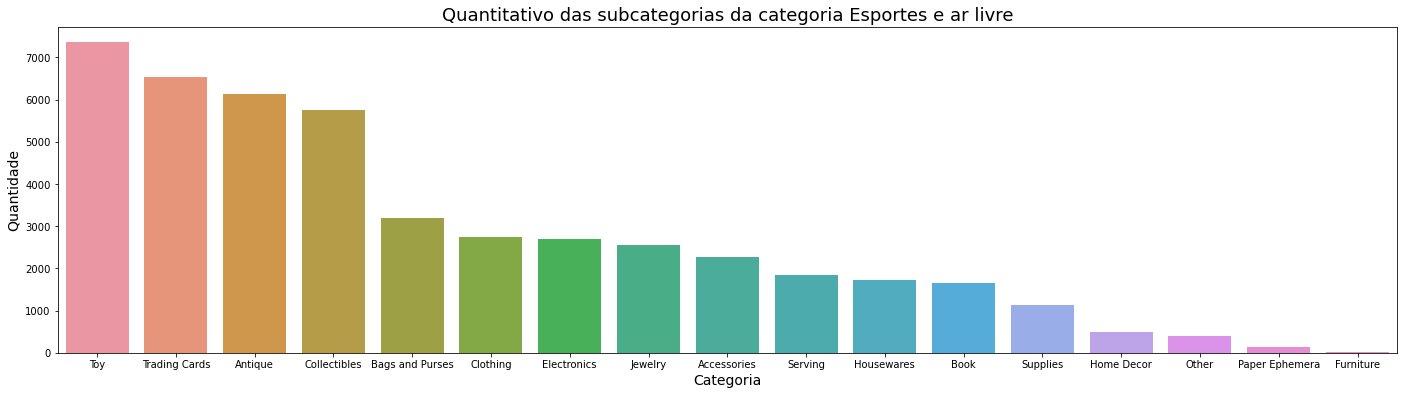

In [77]:
criar_barplot(vintage_collectibles_subcategories_count, 'Quantitativo das subcategorias da categoria Esportes e ar livre', x = 'category_name', y='Count')

# Categoria Beleza | "Beauty"

In [78]:
column_beauty = second_category_dict['Beauty']['category_name'].reset_index(drop=True)
beauty_subcategories_count, __ , beauty_subcategories_percentage= selector.name_and_count_category_level(column_beauty, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Beauty{cf.ENDC}')
beauty_subcategories_count

Valores totais dentro da subcategoria Beauty


,category_name,Count
0,Makeup,124485
1,Skin Care,29689
2,Fragrance,24290
3,Tools & Accessories,13115
4,Bath & Body,7797
5,Hair Care,7715
6,Other,482


In [79]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Beauty{cf.ENDC}')
beauty_subcategories_percentage

Valores percentuais da subcategoria Beauty


,category_name,Percentage
0,Makeup,0.599717
1,Skin Care,0.143029
2,Fragrance,0.117019
3,Tools & Accessories,0.063183
4,Bath & Body,0.037563
5,Hair Care,0.037168
6,Other,0.002322


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Beleza'}, xlabel='Categoria', ylabel='Quantidade'>

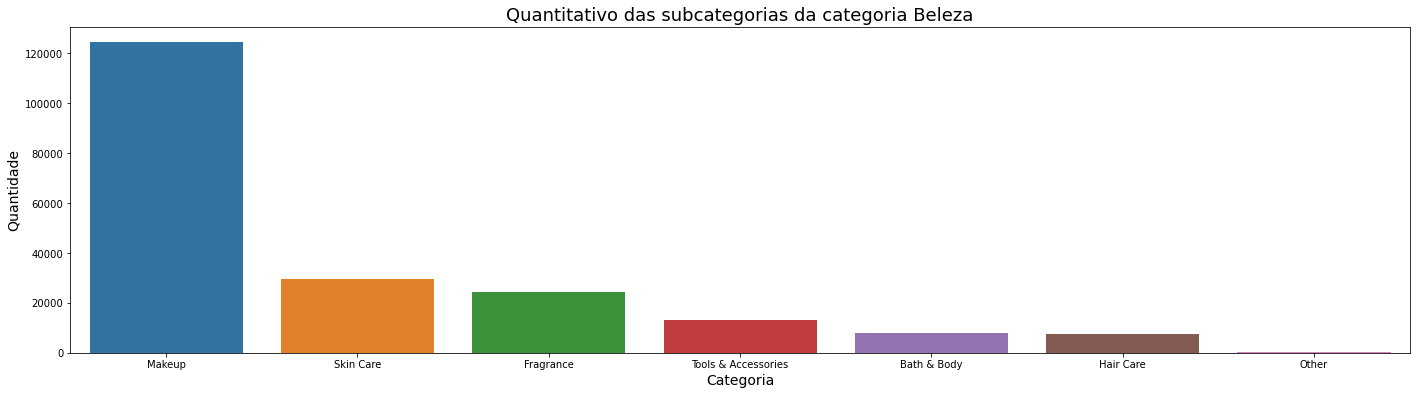

In [80]:
criar_barplot(beauty_subcategories_count, 'Quantitativo das subcategorias da categoria Beleza', x = 'category_name', y='Count')

# Categoria Infantil | "Kids"

In [81]:
column_kids = second_category_dict['Kids']['category_name'].reset_index(drop=True)
kids_subcategories_count, __ , kids_subcategories_percentage= selector.name_and_count_category_level(column_kids, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Kids{cf.ENDC}')
kids_subcategories_count

Valores totais dentro da subcategoria Kids


,category_name,Count
0,Toys,57832
1,Girls 2T-5T,18223
2,Girls 0-24 Mos,17937
3,Boys 0-24 Mos,15302
4,Girls (4+),15187
5,Boys (4+),14724
6,Boys 2T-5T,14288
7,Feeding,4522
8,Diapering,3544
9,Gear,3025


In [82]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Kids{cf.ENDC}')
kids_subcategories_percentage

Valores percentuais da subcategoria Kids


,category_name,Percentage
0,Toys,0.337358
1,Girls 2T-5T,0.106302
2,Girls 0-24 Mos,0.104634
3,Boys 0-24 Mos,0.089263
4,Girls (4+),0.088592
5,Boys (4+),0.085891
6,Boys 2T-5T,0.083348
7,Feeding,0.026379
8,Diapering,0.020674
9,Gear,0.017646


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Infantil'}, xlabel='Categoria', ylabel='Quantidade'>

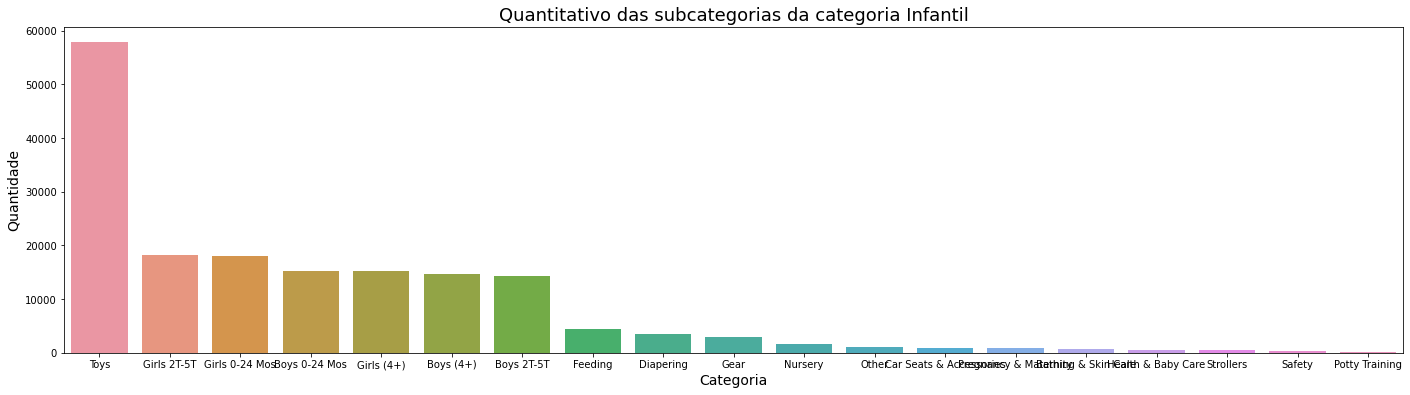

In [83]:
criar_barplot(kids_subcategories_count, 'Quantitativo das subcategorias da categoria Infantil', x = 'category_name', y='Count')

# Inicio da limpeza das colunas name e description

In [84]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [86]:
# funcao para tratar cada palavra e remover stopwords
def processamento(tokens):
    
    token_processado = []
    for token in tokens:
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        
        if token not in stop_words:
            token = stemmer.stem(token)
            token_processado.append(token)
        
    return token_processado

# expressao regular para remover pontuacoes do texto da coluna 
description = train['item_description']
documentos_descript = []
for descript in description:
    
    # expressao regular para remover pontuacoes do texto item_description
    descript = re.sub(r'[^\w\s]','', descript)
    tokens = processamento(word_tokenize(descript))
    
    documentos_descript.append(' '.join(tokens))

In [87]:
# expressao regular para remover pontuacoes do texto da coluna name
name_2 = train['name']
documentos_name = []
for name_3 in name_2:
    
    
    sinopse = re.sub(r'[^\w\s]','', name_3)
    tokens = processamento(word_tokenize(name_3))
    
    documentos_name.append(' '.join(tokens))

In [88]:
#criando a coluna documento_descript
train['description_clear'] = documentos_descript
train['name_clear'] = documentos_name

In [89]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock,date2,day,month,year,description_clear,name_clear
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Other,10.0,1,No description yet,17-5-2018,27,2018-05-17,17,5,2018,descript yet,mlb cincinnati red shirt size xl
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,17-3-2018,15,2018-03-17,17,3,2018,keyboard great condit work like came box port ...,razer blackwidow chroma keyboard
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,24-10-2018,14,2018-10-24,24,10,2018,ador top hint lace key hole back pale pink 1x ...,ava-viv blous
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Other,35.0,1,New with tags. Leather horses. Retail for [rm]...,19-2-2018,1,2018-02-19,19,2,2018,new tag leather hors retail rm stand foot high...,leather hors statu
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Other,44.0,0,Complete with certificate of authenticity,16-4-2018,13,2018-04-16,16,4,2018,complet certif authent,24k gold plate rose
